# TP 2 - Séance 1
## Rehaussement d'image

Équipe #0
- Nom, Prénom (Matricule)
- Nom, Prénom (Matricule)

In [2]:
# Importe les modules qui seront utilisés dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 10)
from scipy.ndimage import convolve

# Exercice I: Prétraitement de radiographies
Le but de cet exercice est d'implémenter un traitement de réhaussement des contrastes et des contours pour des radiographies du thorax.

## Égalisation d'Histogramme

**Remarques**:
- Les intensités des images sont généralement stockées sous la forme de valeur entière comprise entre 0 et 255 (un octet par canal et par pixel) et sont convertis automatiquement en valeurs flottantes comprises entre 0 et 1 par ```imread()```. Cependant pour calculer et manipuler l'histogramme d'une image, on doit manipuler les intensités sous leur forme originale "entière".  
  Vous pourrez convertir en valeurs entières une image qui a été chargée en valeurs flottantes avec:  
  ```img = (imread('radio_thoracique.png')*255).astype(np.uint8)```.


- Par défaut lorsque vous affichez une image avec ```imshow(img, cmap='gray')```, les intensités affichées sont modifiés pour maximiser les contrastes (l'intensité minimale correspondra à la couleur noir, l'intensité maximale à la couleur blanche). Pour forcer l'affichage à conserver les intensités originales il faut lui en spécifier les bornes: ```imshow(img, cmap='gray', vmin=0, vmax=255)```   
  (ou dans le cas flottant: ```imshow(img, cmap='gray', vmin=0, vmax=1)```).

**Q1.** Ouvrez, convertissez en valeurs entières et affichez l'image ```radio_thoracique.png```.   
(Prenez soin de spécifier les bornes des intensités lors de l'affichage.)

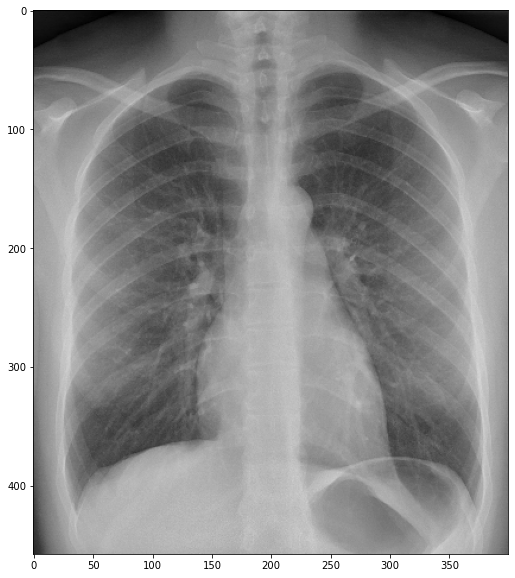

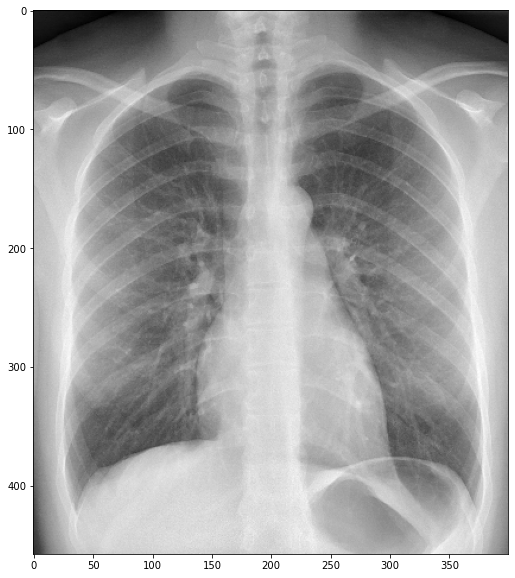

In [6]:
img_radio_thorax = (plt.imread('radio_thoracique.png')*255).astype(np.uint8)

plt.imshow(img_radio_thorax, cmap='gray', vmin=0, vmax=255)
# plt.figure()
# plt.imshow(img_radio_thorax, cmap='gray')

**2.** À l'aide de [np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html), calculez puis affichez son histogramme. Pour gagner du temps aux questions suivantes, vous pouvez définir une méthode qui effectue ces deux opérations.

[  55   56   39   24   46   50    0   68   58   82   79   93    0  119
  106  112  127  130    0  114  124  115  143  148    0  123  127   92
   82   82   67    0   92   79  122  111  115    0  128  123  125  108
  127    0  112  128  124  149  161    0  162  158  176  133  157    0
  189  187  216  272  260  287    0  312  308  306  276  304    0  279
  261  291  274  346    0  383  387  415  486  517    0  540  650  666
  729  835  869    0  922  927 1003 1038 1031    0 1012 1077  982 1064
 1070    0 1077 1037 1060 1080 1056    0 1075 1092 1125 1114 1145    0
 1112 1088 1212 1192 1141 1175    0 1162 1124 1136 1202 1251    0 1253
 1188 1172 1270 1261    0 1265 1278 1326 1285 1200    0 1262 1224 1242
 1231 1372 1216    0 1212 1228 1154 1223 1246    0 1193 1179 1207 1260
 1171    0 1269 1208 1229 1267 1275    0 1292 1361 1405 1437 1400    0
 1460 1417 1417 1483 1480 1479    0 1500 1564 1484 1468 1520    0 1443
 1506 1616 1589 1641    0 1732 1719 1840 1975 1983    0 1948 1887 1981
 1817 

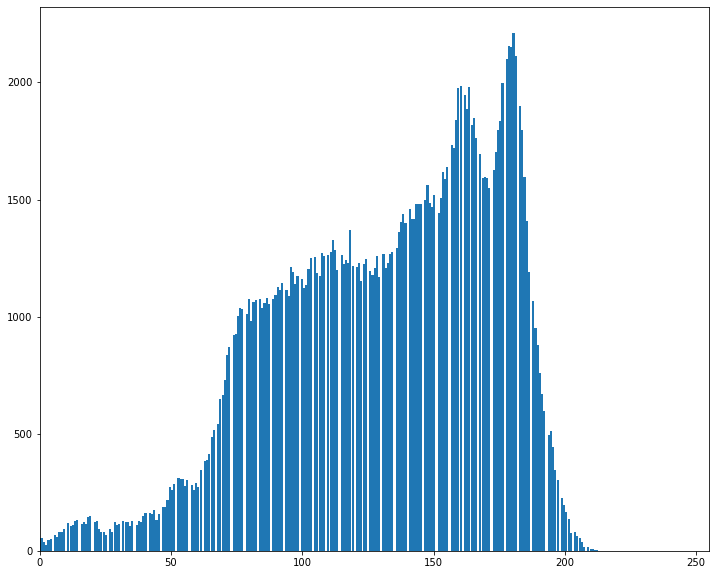

In [45]:
flat_img_radio_thorax = img_radio_thorax.flatten()
hist_radio_thorax, bin_edges = np.histogram(flat_img_radio_thorax, bins=255)
print(hist_radio_thorax)
print(bins_edges)

plt.bar(bin_edges[:-1], hist_radio_thorax) # , width = 1)
plt.xlim(0, 255)   # OU plt.xlim(min(bin_edges), max(bin_edges))   
plt.show() 
#plt.plot(hist_radio_thorax, bins_edges)


#plt.hist(flat_img_radio_thorax, bins=255) # quelle valeur de bins?
#print(hist)
#plt.show()

# METTRE TITRES




**3a.** Complétez la fonction ```equalize_histogram(img)``` qui effectue l'égalisation d'histogramme d'une image et renvoie l'image égalisée.

In [37]:
def equalize_histogram(img):
    # Astuces: 
    #  - pour transformer l'intensité de chaque pixel d'une image I selon un mapping T 
    #    (c'est-à-dire pour calculer Ieq[i,j] = T[I[i,j]] pour tous les i et j), pas besoin de boucle:
    #    il suffit de faire: Ieq = T[I]
    #  - pour calculer la somme cumulée d'un vecteur V, utilisez np.cumsum(V).
 



In [43]:
uniques = np.unique(img_radio_thorax)
print(uniques)
L = len(uniques)
print(L)
M, N = img_radio_thorax.shape
print(M, N)

img_egalise = (L-1)/(M*N)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]
215
458 400


**3b.** Calculez et affichez l'image égalisée et son histogramme. Que constatez vous? Quel impact a l'égalisation sur le contraste de l'image?

## Filtrage High-Boost
Les traitements présentés dans les questions suivantes seront tous appliqué sur la radiographie après égalisation de son histogramme. Pour simplifier l'implémentation des traitements ils seront aussi réalisés sur l'image convertie en intensités flottantes.

En supposant que l'image égalisée soit stockées dans ```img_egalisee```, la conversion d'intensités entières en intensités flottantes est réalisée par la cellule ci-dessous.

In [62]:
# img_egalisee = img_egalisee.astype(np.float) / 255   # np.float64
img_egalisee = img_radio_thorax.astype(np.float64) / 255   # np.float64

**4.** En utilisant la fonction [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html) (de scipy.ndimage), calculez la convolution de l'image égalisée avec une gaussienne de taille 3x3: 

$$ W_\text{Gaussienne3}\ =\ \dfrac{1}{16}\ \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} $$

Affichez côte à côte l'image égalisée et le résultat de la convolution.

_(N'oubliez pas d'indiquer les bornes des intensités: 0 et 1. N'hésitez pas à augmenter la taille de la figure pour mieux observer les images.)_

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


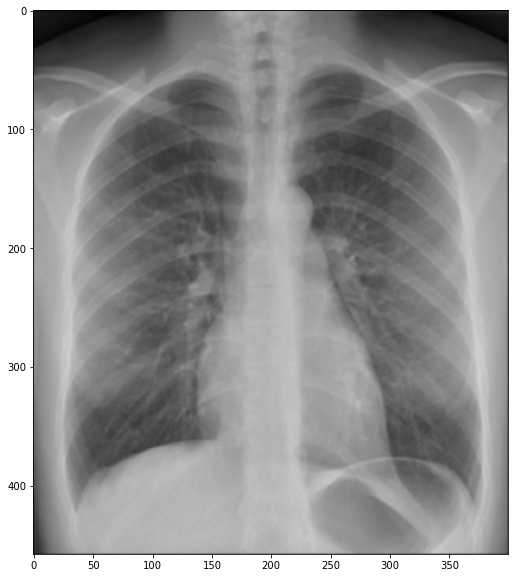

In [63]:
gaussienne = 1/16*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
print(gaussienne)
img_convol = convolve(img_egalisee, gaussienne, mode='constant', cval=0.0)
plt.imshow(img_convol, cmap='gray', vmin=0, vmax=1)

**5a.** Effectuez la même opération (convolution et affichage) avec une gaussienne de taille 7x7: 

$W_\text{Gaussienne7}\ =\ \dfrac{1}{1115}\ 
\begin{bmatrix} 
 1 &  4 &  7 & 10 &  7 &  4 &  1 \\
 4 & 12 & 26 & 33 & 26 & 12 &  4 \\
 7 & 26 & 55 & 71 & 55 & 26 &  7 \\
10 & 33 & 71 & 91 & 71 & 33 & 10 \\
 7 & 26 & 55 & 71 & 55 & 26 &  7 \\
 4 & 12 & 26 & 33 & 26 & 12 &  4 \\
 1 &  4 &  7 & 10 &  7 &  4 &  1 \\
\end{bmatrix} $

**5b.** Qu'observez vous lorsque l'écart-type de la gaussienne augmente (sachant que l'écart-type est proportionnel à la taille du masque)?    
Quel est le type (passe-haut, passe-bas, passe-bande ou coupe-bande) de ces deux filtres gaussiens?

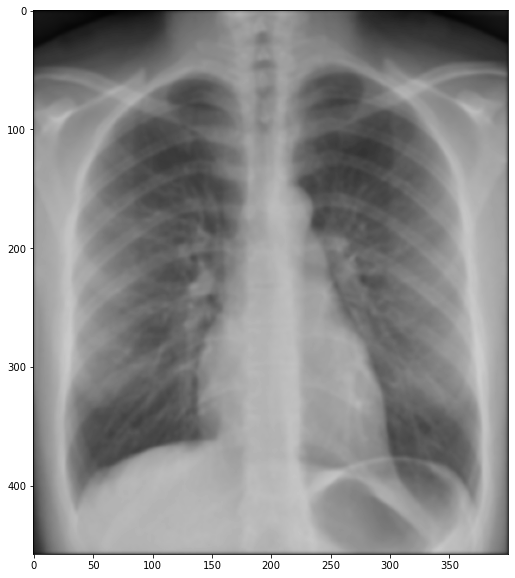

In [65]:
# On vous donne le masque de convolution:
Wgaussienne7 = np.array([[ 1, 4, 7,10, 7, 4, 1],
                         [ 4,12,26,33,26,12, 4],
                         [ 7,26,55,71,55,26, 7],
                         [10,33,71,91,71,33,10],
                         [ 7,26,55,71,55,26, 7],
                         [ 4,12,26,33,26,12, 4],
                         [ 1, 4, 7,10, 7, 4, 1]]) / 1115


img_convol_2 = convolve(img_egalisee, Wgaussienne7, mode='constant', cval=0.0)
plt.imshow(img_convol_2, cmap='gray', vmin=0, vmax=1)

**6a.** Calculez et affichez le Laplacien de l'image égalisée en la convoluant avec:

$$ W_\text{Laplacien} = 
\begin{bmatrix} 
 -1 & -1 & -1 \\
 -1 & 8 & -1 \\
 -1 & -1 & -1 \\
\end{bmatrix} $$

_(Attention: le laplacien d'une image contient des valeurs négatives, pour les visualiser correctement les bornes d'affichages doivent être -1 et 1!)_

**6b.** Quel est le type de ce filtre?

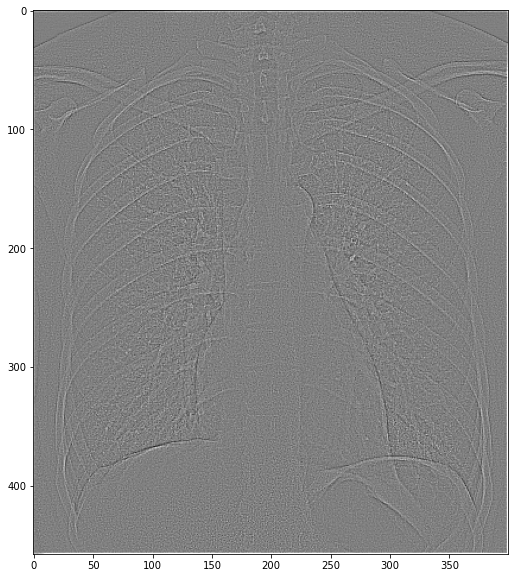

In [67]:
Wlaplacien = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

img_convol_3 = convolve(img_egalisee, Wlaplacien, mode='constant', cval=0.0)
plt.imshow(img_convol_3, cmap='gray', vmin=-1, vmax=1)

# 6b.

**7.** On rappelle que le filtrage high-boost est défini par:  
$$ I_{g} =  I * W_{gaussienne3} $$
$$ I_{HighBoost} = I + k \times (I_g * W_{laplacien}) $$
avec $I$ l'image originale, $I_{HighBoost}$ l'image filtrée, et où $I* W_{gaussienne3}$ est la convolution entre l'image et le masque gaussien de taille 3.

**7a.** Implémentez la function ```high_boost(img, k)``` qui prend en paramètre $I$ et $k$ et renvoie l'image après le filtrage High Boost. Calculez et affichez le résultat pour $k=0$, $k=1$ et $k=2$.

_(Limitez l'affichage entre 0 et 1)_

**7b.** Discutez de l'impact du facteur $k$ sur la lisibilité de l'image (et donc la qualité du réhaussement).

In [ ]:
def high_boost(img, k):
    # return ...

**7c.** Dans ce filtrage, pourquoi calculer le laplacien sur $I_g$ plutôt que sur $I$ directement?  

_(Appuyez-vous sur vos observations de la question 6b.)_

# Exercice II : Filtres médians et morphologiques

Cet exercice met en oeuvre des filtrages médians et morphologiques qui sont implémentés dans les modules pythons:   
```skimage.morphology``` et ```skimage.filters``` importé sous les noms: ```skmorph``` et ```skfilters```.

Si les ```import``` ci-dessous déclenchent une erreur, vous devez probablement installer ces modules en executant dans votre ligne de commande conda:

    conda activate tpGBM  
    conda install scikit-image

In [ ]:
import skimage.filters as skfilters
import skimage.morphology as skmorph

**1a.** Chargez (sans conversion en intensités entières) et affichez l'image ```fundus.png```.

**1b.** Quel est le nom du bruit qui détériore cette image de la rétine?

Pour la suite de l'exercice nous ne nous intéresserons qu'au canal vert de l'image (les trois canneaux de l'image sont dans l'ordre: Rouge - Vert - Bleu).


**2a.** Filtrez le bruit identifié à la question précédente à l'aide d'un filtrage médian [skfilters.median](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median) avec pour élément structurant un disque de rayon 2 (voir [skmorph.disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk)). Affichez côte à côte le canal vert de l'image avant et après le filtrage.

**2b.** Le filtrage gaussien présenté dans l'exercice I aurait-il été un meilleur ou moins bon choix pour cette tâche?

Les traitements présentés dans les deux sections suivantes seront appliqués sur **la version filtrée du canal vert** de l'image notée $I_V$.

## Rehaussement des vaisseaux

Afin de simplifier la détection des vaisseaux sur les images de la rétine, un prétraitement très utilisé consiste à effectuer une correction d'illumination locale. En définissant $F_{m}$ un filtre médian avec un large élément structurant (un disque de rayon 12), l'image prétraitée $I_P$ est calculée par: $I_P = I_V - F_m(I_V)$.

**3a.** Calculez et affichez le résultat du filtrage médian $F_{m}(I_V)$ et du prétraitement $I_P$. Cette correction d'illumination est-elle efficace?

**3b.** Les vaisseaux sont-ils un contenu hautes ou basses fréquences spatiales? Même question pour le résultat du filtrage médian $F_{m}(I_V)$.

## Segmentation du disque optique

On se propose de segmenter le disque optique (la tête du nerf optique apparaît en clair sur l'image et les vaisseaux en émergent) avec un seuil et des opérations morphologiques.

**4a.** Implémentez la fonction ```binariser(img, seuil)``` qui prend en paramètre une image et un seuil et qui renvoie l'image binarisée: où tous les pixels inférieurs au seuil valent $0$ et tous ceux supérieurs au seuil valent $1$.

**4b.** Calculez et affichez l'image $I_V$ binarisée avec un seuil de $0.6$.

Vous devriez constater deux erreurs:
1. Les vaisseaux émergeant du disque optique forment des trous dans sa segmentation.
2. Un artefact est détecté à tort dans le coin supérieur droit de l'image. 
 
On va corriger ces deux erreurs avec une ouverture et une fermeture (voir [skmorph.binary_opening](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_opening) et [skmorph.binary_closing](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_closing))

**5a.** Refermez les trous causés par les vaisseaux à l'aide de l'opération morphologique adéquate. Vous devrez choisir un élément structurant adapté. 

**5b.** Effacez l'artefact supérieur droit sans altérer la segmentation du disque avec l'autre opération morphlogique. Une fois encore, choisissez un élément structurant adapté.

On souhaite faire une estimation rapide du rayon et du centre du disque optique tel qu'il a été segmenté aux questions précédentes.

**6.** En effectuant des érosions successives de la segmentation par des disques de rayon 1,2,3... jusqu'à ce que la segmentation disparaisse, déterminez le rayon et la position du centre du disque optique.

In [ ]:
# Astuce: np.any(I) renvoie Faux si tous les pixels de I valent 0
#         y, x = np.where(I) renvoie les coordonées des pixels différents de 0 de I. 
